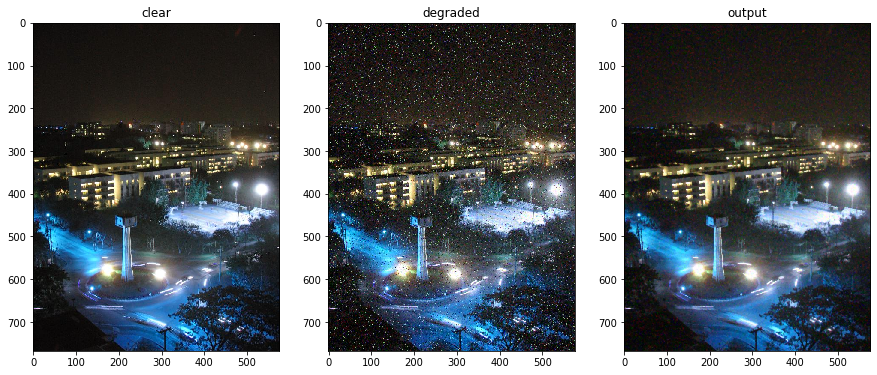

In [98]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

def median_filt(degraded):
    
    h = degraded.shape[0]
    w = degraded.shape[1]
#     degraded = np.pad(degraded,(1,1),mode='constant')
    
    new_h = degraded.shape[0]
    new_w = degraded.shape[1]
    output = np.zeros((new_h,new_w,3))
#     kernel = np.flipud(np.fliplr(filt))
#     hsv = cv2.cvtColor(degraded, cv2.COLOR_BGR2HSV)
#     degraded = hsv
    for i in range(1,new_h-1):
        for j in range(1,new_w-1):
            values_r = []
            values_g = []
            values_b = []
            values_b = np.ravel(degraded[i-1:i+2,j-1:j+2,0])
            values_g = np.ravel(degraded[i-1:i+2,j-1:j+2,1])
            values_r = np.ravel(degraded[i-1:i+2,j-1:j+2,2])
            values_b.sort()
            values_g.sort()
            values_r.sort()
#             if i==1 and j==1:
#                 print(degraded[i-1:i+2][j-1:j+2])
            l = (len(values_b)//2)
            median_b = values_b[4]
            median_g = values_g[4]
            median_r = values_r[4]
            output[i,j,0] = median_b
            output[i,j,1] = median_g
            output[i,j,2] = median_r
            
#             output[i,j] = np.sum(degraded[j-1:j+2,i-1:i+2]*kernel)
#             output = cv2.cvtColor(output, cv2.COLOR_HSV2BGR)

    return output

degraded = cv2.imread('../input/Degraded.jpg')
# print(degraded.shape)
clear = cv2.imread('../input/Clear.jpg')

output = median_filt(degraded)

cv2.normalize(output,output,0,255,cv2.NORM_MINMAX,dtype=-1)
output = output.astype(np.uint8)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(clear)
plt.title('clear')
plt.subplot(1,3,2)
plt.imshow(degraded)
plt.title('degraded')
plt.subplot(1,3,3)
plt.imshow(output)
plt.title('output')
plt.show()


Since the degraded image has salt and pepper noise , we use median filter. The median filter is applied over all the three channels R,G and B. Then the median for each particular window is found and this eliminates the white and black speckles in the image 